# Exercise 3
## Multi-class Classification & Neural Networks

## Multi-class Classification
### Loading the dataset

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = loadmat('ex3data1.mat')
X_raw = data['X']
y = data['y']
print(X_raw.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [2]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

### Visualizing the data
the code for the plot below is from [here](https://medium.com/analytics-vidhya/a-guide-to-using-logistic-regression-for-digit-recognition-with-python-codes-86aae6da10fe)

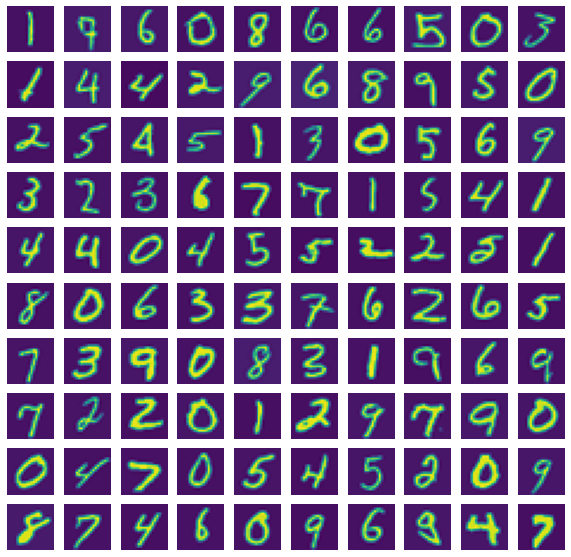

In [3]:
np.random.seed(42)
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X_raw[np.random.randint(X_raw.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off') 

In [4]:
m = len(y)
ones = np.ones((m, 1))
X = np.hstack((ones, X_raw))
m, n = X.shape
k = 10 # 10 models
theta = np.zeros((k, n))

In [5]:
print(theta.shape)
print(X.shape)

(10, 401)
(5000, 401)


### The cost and gradient function
! You SHOULD always write your own function first, based on the equation provided in the guide and the original lecture. The code provided in this notebook is only meant as a reference when you get stuck

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def costFunctionReg(theta, X, y, lmbd):
    m = len(y)
    z = np.dot(X, theta)
    term1 = np.multiply(-y, np.log(sigmoid(z)))
    term2 = np.multiply((1-y), np.log(1-sigmoid(z)))
    J = (1/m)*np.sum(term1 - term2) + lmbd/(2*m)*np.sum(theta[1:]**2)
    return J

In [8]:
def grad(theta, X, y, lmbd):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = 1/m * (np.dot(X.T, temp))
    temp[1:] = temp[1:] + (lmbd/m)*theta[1:]
    return temp

It's important to check whether the function you write (`grad` and `costFunctionReg`) works for matrix operations or not. You can check your function using the cell below, it should give the same numbers. 

Another thing to note, it is possible that even if your function works for the cell below, it does not work when you put your function to the arguments of Scipy's `minimize` or `fmin_nc` function (i.e. it gives out warning and just stop in the middle). You should always check the output of each step in the function you've written

In [9]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J = costFunctionReg(theta_t, X_t, y_t, 3)
grad_2 = grad(theta_t, X_t, y_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad_2,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [10]:
def gradientDescent(X, y, theta_initial, alpha, iterations, lmbd):
    m = len(y)
    theta = theta_initial.copy()
    J_val = []
    for i in range(iterations):
        grad2 = grad(theta, X, y, lmbd)
        cost = costFunctionReg(theta, X, y, lmbd)
        theta -= alpha*grad2
        J_val.append(cost)
    return theta, J_val

## One-vs-all Classification

In [11]:
def oneVsAll(X, y, alpha, iterations, lmbd, digitlabel):
    m, n = X.shape
    theta = np.zeros((n,1))
    theta_val =[]
    J_val = []
    k = digitlabel

    for i in range(k):
        digitlabel = i if i else 10
        theta1, J = gradientDescent(X, np.where(y==digitlabel,1,0), theta, alpha, iterations, lmbd)
        theta_val.extend(theta1)
        J_val.append(J)  
    return np.array(theta_val).reshape(k, n), J_val

In [12]:
iterations = 300
theta_optimized1, J_value = oneVsAll(X, y, alpha=1, iterations=300, lmbd=0.1, digitlabel=10)

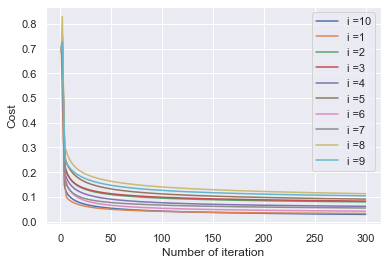

In [13]:
sns.set()
for i in range(10):
    plt.plot(np.arange(1,iterations+1), J_value[i], label='i ='+str(i if i else 10))
plt.xlabel('Number of iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [14]:
def predictOneVsAll(theta, X):
    m, n = X.shape
    pred = np.dot(X, theta.T)
    return np.argmax(pred, axis=1)

In [15]:
pred1 = predictOneVsAll(theta_optimized1, X)
pred1 = [e if e else 10 for e in pred1]
print(f'Training set accuracy: {np.mean(pred1 == y.flatten()) * 100:.4f}%')

Training set accuracy: 91.4600%


In [16]:
from scipy.optimize import fmin_cg

lmbd = 0.1
k = 10
theta_optimized2 = np.zeros((k,n))
for i in range(k):
    digitlabel = i if i else 10
    theta_optimized2[i] = fmin_cg(f = costFunctionReg, x0 = theta_optimized2[i],  fprime = grad, args = (X, np.where(y == digitlabel,1,0).flatten(), lmbd))

Optimization terminated successfully.
         Current function value: 0.008571
         Iterations: 122
         Function evaluations: 470
         Gradient evaluations: 470
Optimization terminated successfully.
         Current function value: 0.013119
         Iterations: 105
         Function evaluations: 410
         Gradient evaluations: 410
Optimization terminated successfully.
         Current function value: 0.050807
         Iterations: 257
         Function evaluations: 797
         Gradient evaluations: 797
Optimization terminated successfully.
         Current function value: 0.057619
         Iterations: 253
         Function evaluations: 751
         Gradient evaluations: 751
Optimization terminated successfully.
         Current function value: 0.033070
         Iterations: 184
         Function evaluations: 602
         Gradient evaluations: 602
Optimization terminated successfully.
         Current function value: 0.054470
         Iterations: 262
         Function ev

In [17]:
pred2 = predictOneVsAll(theta_optimized2, X)
pred2 = [e if e else 10 for e in pred2]
print(f'Training set accuracy: {np.mean(pred2 == y.flatten()) * 100:.4f}%')

Training set accuracy: 96.4400%


In [18]:
from scipy.optimize import minimize

lmbd = 0.1
k = 10
theta_optimized3 = np.zeros((k,n))
for i in range(k):
    digitlabel = i if i else 10
    temp = minimize(fun = costFunctionReg, x0 = theta_optimized3[i],  jac = grad, args = (X, np.where(y == digitlabel,1,0).flatten(), lmbd), method='CG')
    theta_optimized3[i] = temp.x

In [19]:
pred3 = predictOneVsAll(theta_optimized3, X)
pred3 = [e if e else 10 for e in pred3]
print(f'Training set accuracy: {np.mean(pred3 == y.flatten()) * 100:.4f}%')

Training set accuracy: 96.4400%


The `minimize` and `fmin_cg` function give the same training accuracy of 96.44%, while the `gradientDescent` method gives lower accuracy of 91.46%

## Neural Networks
### Loading the dataset

In [21]:
mat2=loadmat("ex3weights.mat")
Theta1=mat2["Theta1"]
Theta2=mat2["Theta2"]
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


### Feedforward Propagation and Prediction

In [71]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X)) 
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    return np.argmax(a2,axis=1)+1

In [76]:
pred3 = predict(Theta1, Theta2, X_raw)
print(f'Training set accuracy: {np.mean(pred3 == y.flatten()) * 100:.4f}%')

Training set accuracy: 97.5200%


In [134]:
print(f'a1 = {X.shape}.{Theta1.T.shape}')
print(f'a1 plus extra bias unit = {(X @ Theta1.T).shape[0], (X @ Theta1.T).shape[1]+1}')
print(f'a2 = {(X @ Theta1.T).shape[0], (X @ Theta1.T).shape[1]+1}.{Theta2.T.shape}')

a1 = (5000, 401).(401, 25)
a1 plus extra bias unit = (5000, 26)
a2 = (5000, 26).(26, 10)
